# Fuel Consumption

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_fuel_consumption = pd.read_csv(r"F:\Self Learning\Code_basics_projects\Fuel Consumption Dataset\FuelConsumptionCo2.csv")
df_fuel_consumption

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [6]:
df_fuel_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
df_fuel_consumption.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [19]:
df_consumption_by_make = df_fuel_consumption.groupby("MAKE")["CO2EMISSIONS"].mean().sort_values(ascending=False).to_frame().head(5)
df_consumption_by_make

,CO2EMISSIONS
MAKE,
LAMBORGHINI,394.000000
SRT,389.000000
ROLLS-ROYCE,381.000000
BENTLEY,359.000000
ASTON MARTIN,351.571429


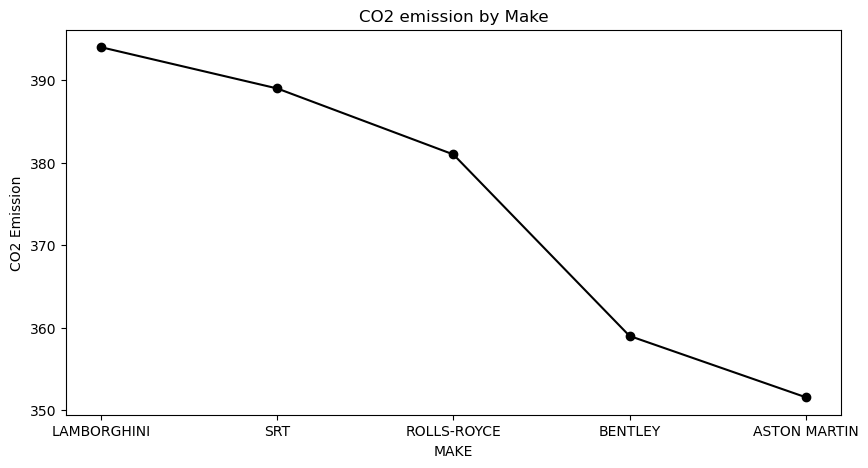

In [106]:
plt.figure(figsize=(10,5))
plt.plot(df_consumption_by_make, marker='o', color="black", linestyle='-')
plt.xlabel("MAKE")
plt.ylabel("CO2 Emission")
plt.title("CO2 emission by Make")
plt.show()

In [48]:
df_make_model_emmision = df_fuel_consumption.groupby(["MAKE","VEHICLECLASS"])["CO2EMISSIONS"].mean().to_frame()
df_make_model_emmision.reset_index(inplace=True)
df_make_model_emmision.head()

,MAKE,VEHICLECLASS,CO2EMISSIONS
0,ACURA,COMPACT,204.833333
1,ACURA,MID-SIZE,246.000000
2,ACURA,SUV - SMALL,249.500000
3,ASTON MARTIN,MINICOMPACT,359.000000
4,ASTON MARTIN,SUBCOMPACT,359.000000


In [55]:
df_make_model_emmision[df_make_model_emmision["VEHICLECLASS"]=="MINICOMPACT"].sort_values(by="CO2EMISSIONS", ascending=False)

,MAKE,VEHICLECLASS,CO2EMISSIONS
3,ASTON MARTIN,MINICOMPACT,359.000000
88,JAGUAR,MINICOMPACT,306.833333
148,PORSCHE,MINICOMPACT,251.550000
164,SUBARU,MINICOMPACT,208.500000
130,MINI,MINICOMPACT,184.666667
157,SCION,MINICOMPACT,184.666667
52,FIAT,MINICOMPACT,175.250000


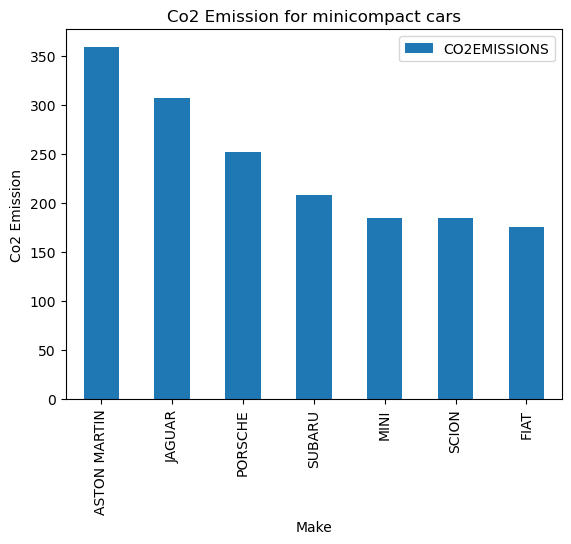

In [70]:
df_make_model_emmision[df_make_model_emmision["VEHICLECLASS"]=="MINICOMPACT"].sort_values(by="CO2EMISSIONS", ascending=False).plot(kind="bar", xlabel="Make", ylabel="Co2 Emission", title="Co2 Emission for minicompact cars")
plt.show()

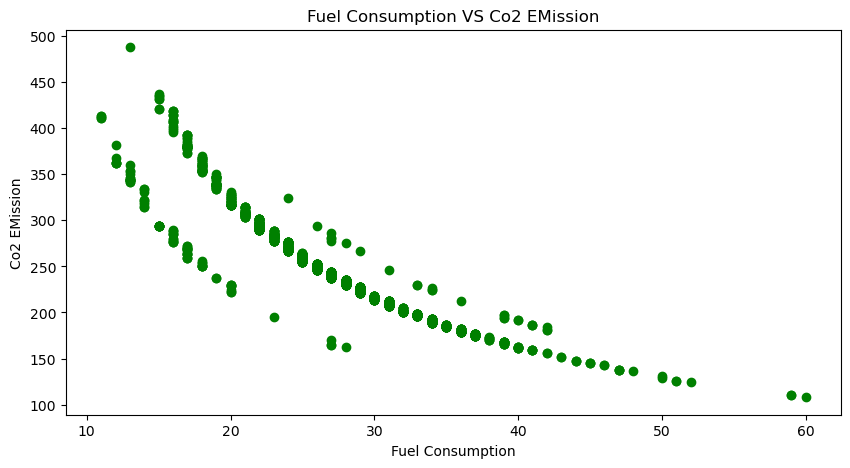

In [81]:
plt.figure(figsize=(10, 5))
plt.scatter(df_fuel_consumption["FUELCONSUMPTION_COMB_MPG"], df_fuel_consumption["CO2EMISSIONS"], marker='o', c='g')
plt.xlabel("Fuel Consumption")
plt.ylabel("Co2 EMission")
plt.title("Fuel Consumption VS Co2 EMission")
plt.show()

In [95]:
y = df_fuel_consumption.groupby("CYLINDERS")["CO2EMISSIONS"].mean().to_frame()
y.reset_index(inplace=True)

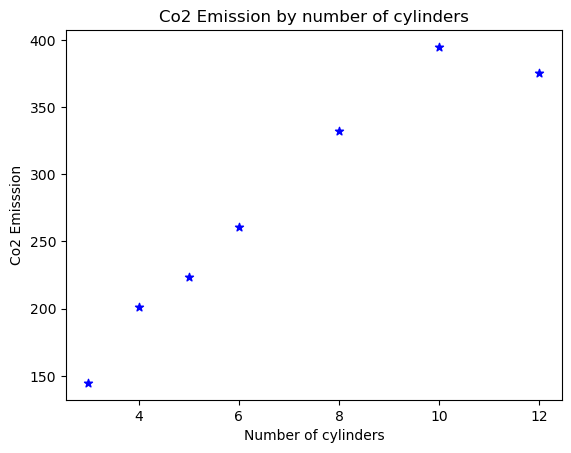

In [102]:
plt.scatter(y["CYLINDERS"], y["CO2EMISSIONS"], marker = '*', c='b')
plt.xlabel("Number of cylinders")
plt.ylabel("Co2 Emisssion")
plt.title("Co2 Emission by number of cylinders")
plt.show()

In [17]:
x = df_fuel_consumption.groupby("FUELTYPE")["CO2EMISSIONS"].mean().to_frame()

In [18]:
x.reset_index(inplace=True)

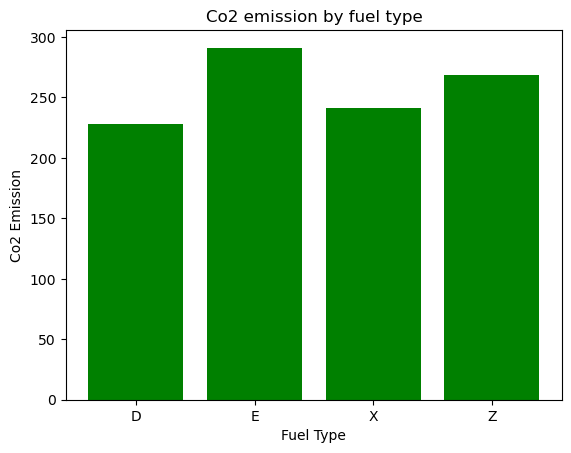

In [19]:
# Here we are going to plot Co2 emissions by fuel types
plt.bar(x['FUELTYPE'], x['CO2EMISSIONS'], color='green')
plt.xlabel("Fuel Type")
plt.ylabel("Co2 Emission")
plt.title("Co2 emission by fuel type")
plt.show()

In [119]:
# Maximim fuel consumption
df_fuel_consumption[df_fuel_consumption['CO2EMISSIONS'] == df_fuel_consumption['CO2EMISSIONS'].max()]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
349,2014,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A5,X,23.9,17.8,21.2,13,488


In [120]:
# Minimum fuel consumption
df_fuel_consumption[df_fuel_consumption['CO2EMISSIONS'] == df_fuel_consumption['CO2EMISSIONS'].min()]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
988,2014,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,4.6,4.9,4.7,60,108


In [14]:
c = df_fuel_consumption.groupby("MAKE")[["FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]].mean().sort_values(by="FUELCONSUMPTION_HWY", ascending=False).head(5)
c

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
MAKE,,
GMC,19.200000,13.746939
LAMBORGHINI,20.466667,13.066667
SRT,20.000000,13.000000
ROLLS-ROYCE,19.957143,12.485714
LAND ROVER,17.163158,12.247368


In [141]:
c

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
MAKE,,
GMC,19.200000,13.746939
LAMBORGHINI,20.466667,13.066667
SRT,20.000000,13.000000
ROLLS-ROYCE,19.957143,12.485714
LAND ROVER,17.163158,12.247368


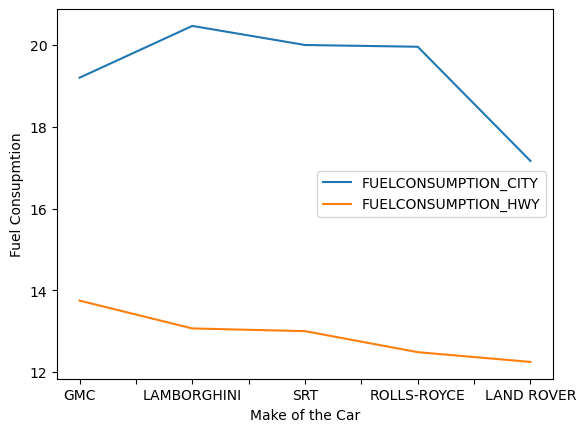

In [15]:
# Here we are plotting the different fuel consumptions with respect to the fuel consumption
c.plot()
plt.xlabel("Make of the Car")
plt.ylabel("Fuel Consupmtion")
plt.show()

In [12]:
# Here are the top 5 model with the highest CO2 emissions
df_fuel_consumption.groupby("MODEL")["CO2EMISSIONS"].mean().to_frame().head()

,CO2EMISSIONS
MODEL,
1500 (MDS),326.5
1500 4X4 (MDS),339.0
1500 4X4 DIESEL,286.0
1500 4X4 FFV,287.5
1500 DIESEL,275.0
